MSE: 575601.50
R² Score: 0.6752
Accuracy: 24.38%


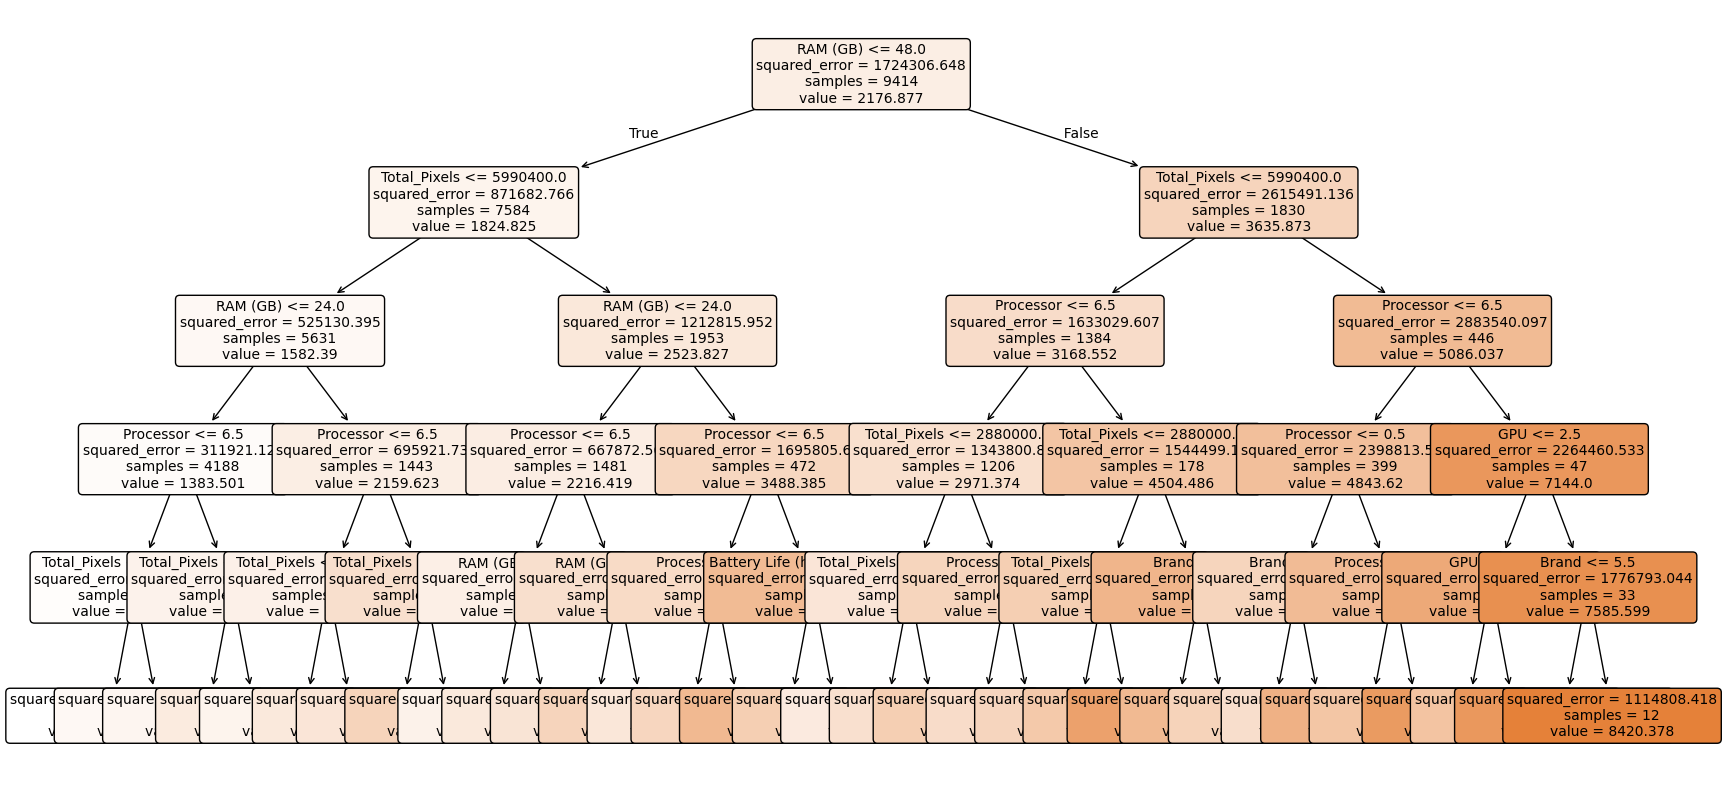

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
file_path = r"C:\Users\Sanjay\Desktop\ML Tutorial\archive\laptop_prices.csv"
df = pd.read_csv(file_path)

# Convert Storage to numerical format (handling missing values)
df['Storage'] = df['Storage'].str.extract(r'(\d+)').dropna().astype(float)

# Convert Resolution to total pixel count
df[['Width', 'Height']] = df['Resolution'].str.split('x', expand=True).astype(float)
df['Total_Pixels'] = df['Width'] * df['Height']
df.drop(columns=['Resolution', 'Width', 'Height'], inplace=True)

# Encode categorical variables
label_encoders = {}
for col in ['Brand', 'Processor', 'GPU', 'Operating System']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target variable
X = df.drop(columns=['Price ($)'])
y = df['Price ($)']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)

# Predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate accuracy as percentage of predictions within 10% tolerance of actual values
tolerance = 0.1 * y_test  # 10% of actual price
correct_predictions = np.abs(y_test - y_pred) <= tolerance
accuracy = np.mean(correct_predictions) * 100  # Convert to percentage

# Print evaluation metrics
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.4f}")
print(f"Accuracy: {accuracy:.2f}%")  # Display accuracy percentage

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.show()
